In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
ages = [160, 11.2,119,108,160,49,120]
genewise_concordance = [3.06,22.5,3.29,1.66,.5,5.22,2.98]
orthogroupwise_concordance = [5.125,25,6.92,9.5,4,6,5.2]
random_concordance = [2,1.25,1.06,1,1,1.25,0.88]


In [13]:
plotting_df = pd.DataFrame(columns = ['Age','Genewise Condcordant Ratio','Orthogroupwise Concordant Ratio',' Random Orthogroup Concordant Ratio'], data = zip(ages,genewise_concordance,orthogroupwise_concordance, random_concordance) )
plotting_df

,Age,Genewise Condcordant Ratio,Orthogroupwise Concordant Ratio,Random Orthogroup Concordant Ratio
0,160.0,3.06,5.125,2.00
1,11.2,22.50,25.000,1.25
2,119.0,3.29,6.920,1.06
3,108.0,1.66,9.500,1.00
4,160.0,0.50,4.000,1.00
5,49.0,5.22,6.000,1.25
6,120.0,2.98,5.200,0.88


In [14]:
plotting_df['Difference in Performance'] = plotting_df['Orthogroupwise Concordant Ratio'] - plotting_df['Genewise Condcordant Ratio']
plotting_df['Percent Improvement'] = plotting_df['Difference in Performance']/plotting_df['Genewise Condcordant Ratio']*100

In [15]:
plotting_df

,Age,Genewise Condcordant Ratio,Orthogroupwise Concordant Ratio,Random Orthogroup Concordant Ratio,Difference in Performance,Percent Improvement
0,160.0,3.06,5.125,2.00,2.065,67.483660
1,11.2,22.50,25.000,1.25,2.500,11.111111
2,119.0,3.29,6.920,1.06,3.630,110.334347
3,108.0,1.66,9.500,1.00,7.840,472.289157
4,160.0,0.50,4.000,1.00,3.500,700.000000
5,49.0,5.22,6.000,1.25,0.780,14.942529
6,120.0,2.98,5.200,0.88,2.220,74.496644


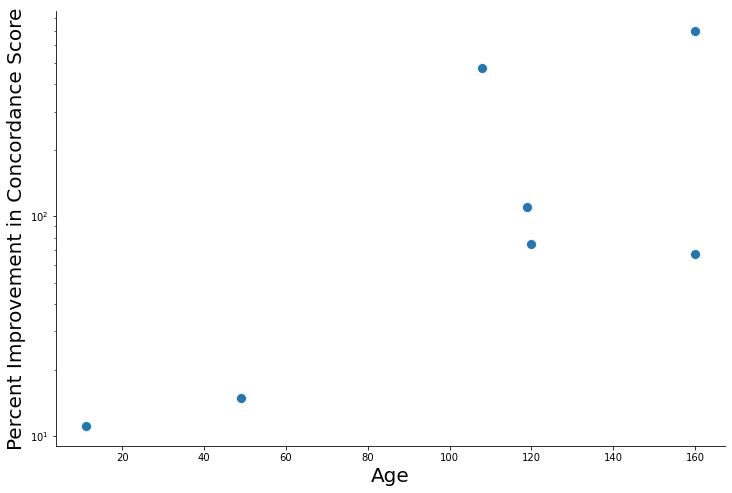

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
sns.scatterplot(data = plotting_df, x = 'Age',y = 'Percent Improvement', s = 100)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Percent Improvement in Concordance Score", fontsize = 20)
sns.despine()
ax.set(yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,3))
#plt.ylim((0, 3))
#handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(handles, ['Accepted Coexpressolog', 'Rejected Coexpressolog'], loc='lower right')
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
#ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)

(10, 750)

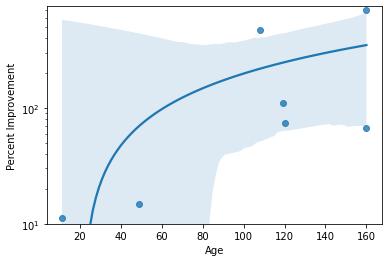

In [17]:
ax = sns.regplot(data=plotting_df, x="Age", y="Percent Improvement", ci = 95)
ax.set(yscale = 'log')
plt.ylim((10, 750))


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats


In [19]:
slope, intercept, r_value, p_value, std_err = linregress(plotting_df['Age'], np.log10(plotting_df['Percent Improvement']))
y_log = np.log10(plotting_df['Percent Improvement'])

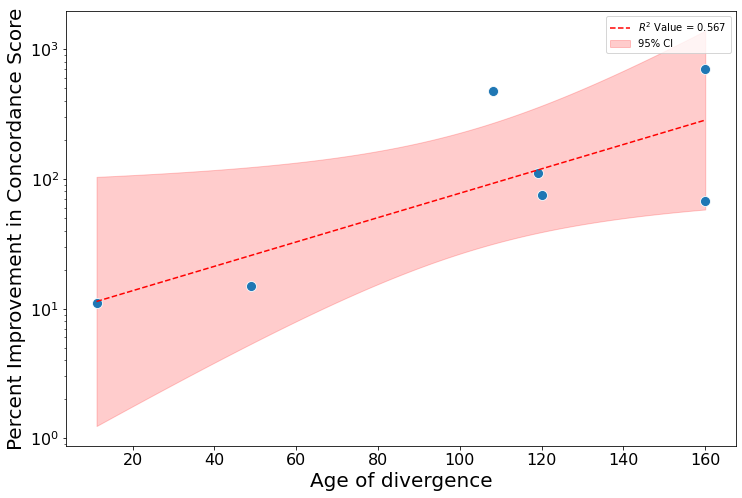

In [20]:

x = plotting_df['Age']
y = plotting_df['Percent Improvement']
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = 10**(slope * x_fit + intercept) 

mask = y > 0
x_clean = x[mask]
y_clean = y[mask]

# Fit a line to the log10-transformed data
y_log = np.log10(y_clean)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_log)

# Calculate confidence intervals
x_fit = np.linspace(x_clean.min(), x_clean.max(), 100)
y_fit = slope * x_fit + intercept

# Get the mean x value and sum of squared deviations from mean
x_mean = np.mean(x_clean)
x_dev = np.sum((x_clean - x_mean)**2)

# Calculate confidence intervals
n = len(x_clean)
y_pred = slope * x_clean + intercept
mean_squared_error = np.sum((y_log - y_pred)**2) / (n-2)

# Standard error of the regression line
se = np.sqrt(mean_squared_error * (1/n + (x_fit - x_mean)**2 / x_dev))
alpha = 0.05  # 95% confidence interval
t_value = stats.t.ppf(1-alpha/2, n-2)
ci = t_value * se

# Transform back to original scale
y_fit_line = 10**(y_fit)
y_fit_upper = 10**(y_fit + ci)
y_fit_lower = 10**(y_fit - ci)

fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
plt.plot(x_fit, y_fit_line, 'r--', label="$R^2$ Value = 0.567", )
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.2, label='95% CI')
sns.scatterplot(data = plotting_df, x = 'Age',y = 'Percent Improvement', s = 100)
plt.xlabel("Age of divergence", fontsize = 20)
plt.ylabel("Percent Improvement in Concordance Score", fontsize = 20)
plt.xticks(fontsize = 16,)
plt.yticks(fontsize = 16)
ax.set_yscale('log')

plt.show()

In [ ]:
sns.boxplot(data = plotting_df, x = 'Age', y = 'Percent Improvement')

In [54]:
r_value**2

0.5673683014298921